# Predicting the compressive strength of concrete
## Introduction

Concrete quality is typically defined by it's compressive strength. Civil engineers will carry out rigorous testing using varying combinations of raw materials and curing time. The process of testing concrete compressive strength can be found [here](http://www.civilengineeringforum.me/compressive-strength-test-of-concrete/). With curing time taking up to 91 days in some cases, the whole process is very time consuming and labour intensive.

There is a clear opportunity for digital simulation to reduce wait time and total number of combinations. With the data set acquired we can learn about the relations between variables and develop a predictive model. Highlighting potentially optimal combinations to then be used in physical testing will provide enormous benefit and significantly reduce labour and testing costs.

## Data Collection

In this project we will be using the [Concrete Compressive Strength data set](https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength) from the UCI Machine Learning Repository.

The data contains over 1,000 instances of concrete each with 9 variables (including compressive strength).

## Initial Setup and Checks

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
df = pd.read_excel('Concrete_Data.xls')

In [5]:
df.shape

(1030, 9)

In [6]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

Thankfully data does not contain any missing values so there is no need for imputing. However, the field titles are overly descriptive for our purposes so let's rename them to be more succinct.

In [9]:
updated_col_names = ['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
                     'Coarse Aggregrate', 'Fine Aggregate', 'Age', 'Compressive Strength']

df.columns = updated_col_names

## Exploratory Data Analysis
The first, and arguably most important, step in a data science project is to explore the data in an attempt to gain insights that will guide the rest of the project. EDA generally includes ensuring the data is clean and usable, visualising features and their relationships, observing distributions, etc.

First of all, let's take a closer look at the input features and try to identify any correlations.

In [10]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregrate,Fine Aggregate,Age,Compressive Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


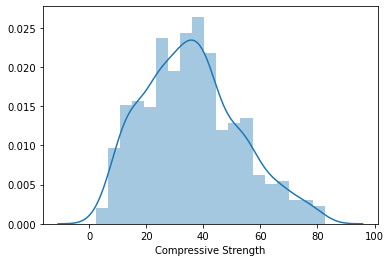

In [11]:
sns.distplot(df['Compressive Strength'])

The distribution looks close to normal so no need to make any changes here.

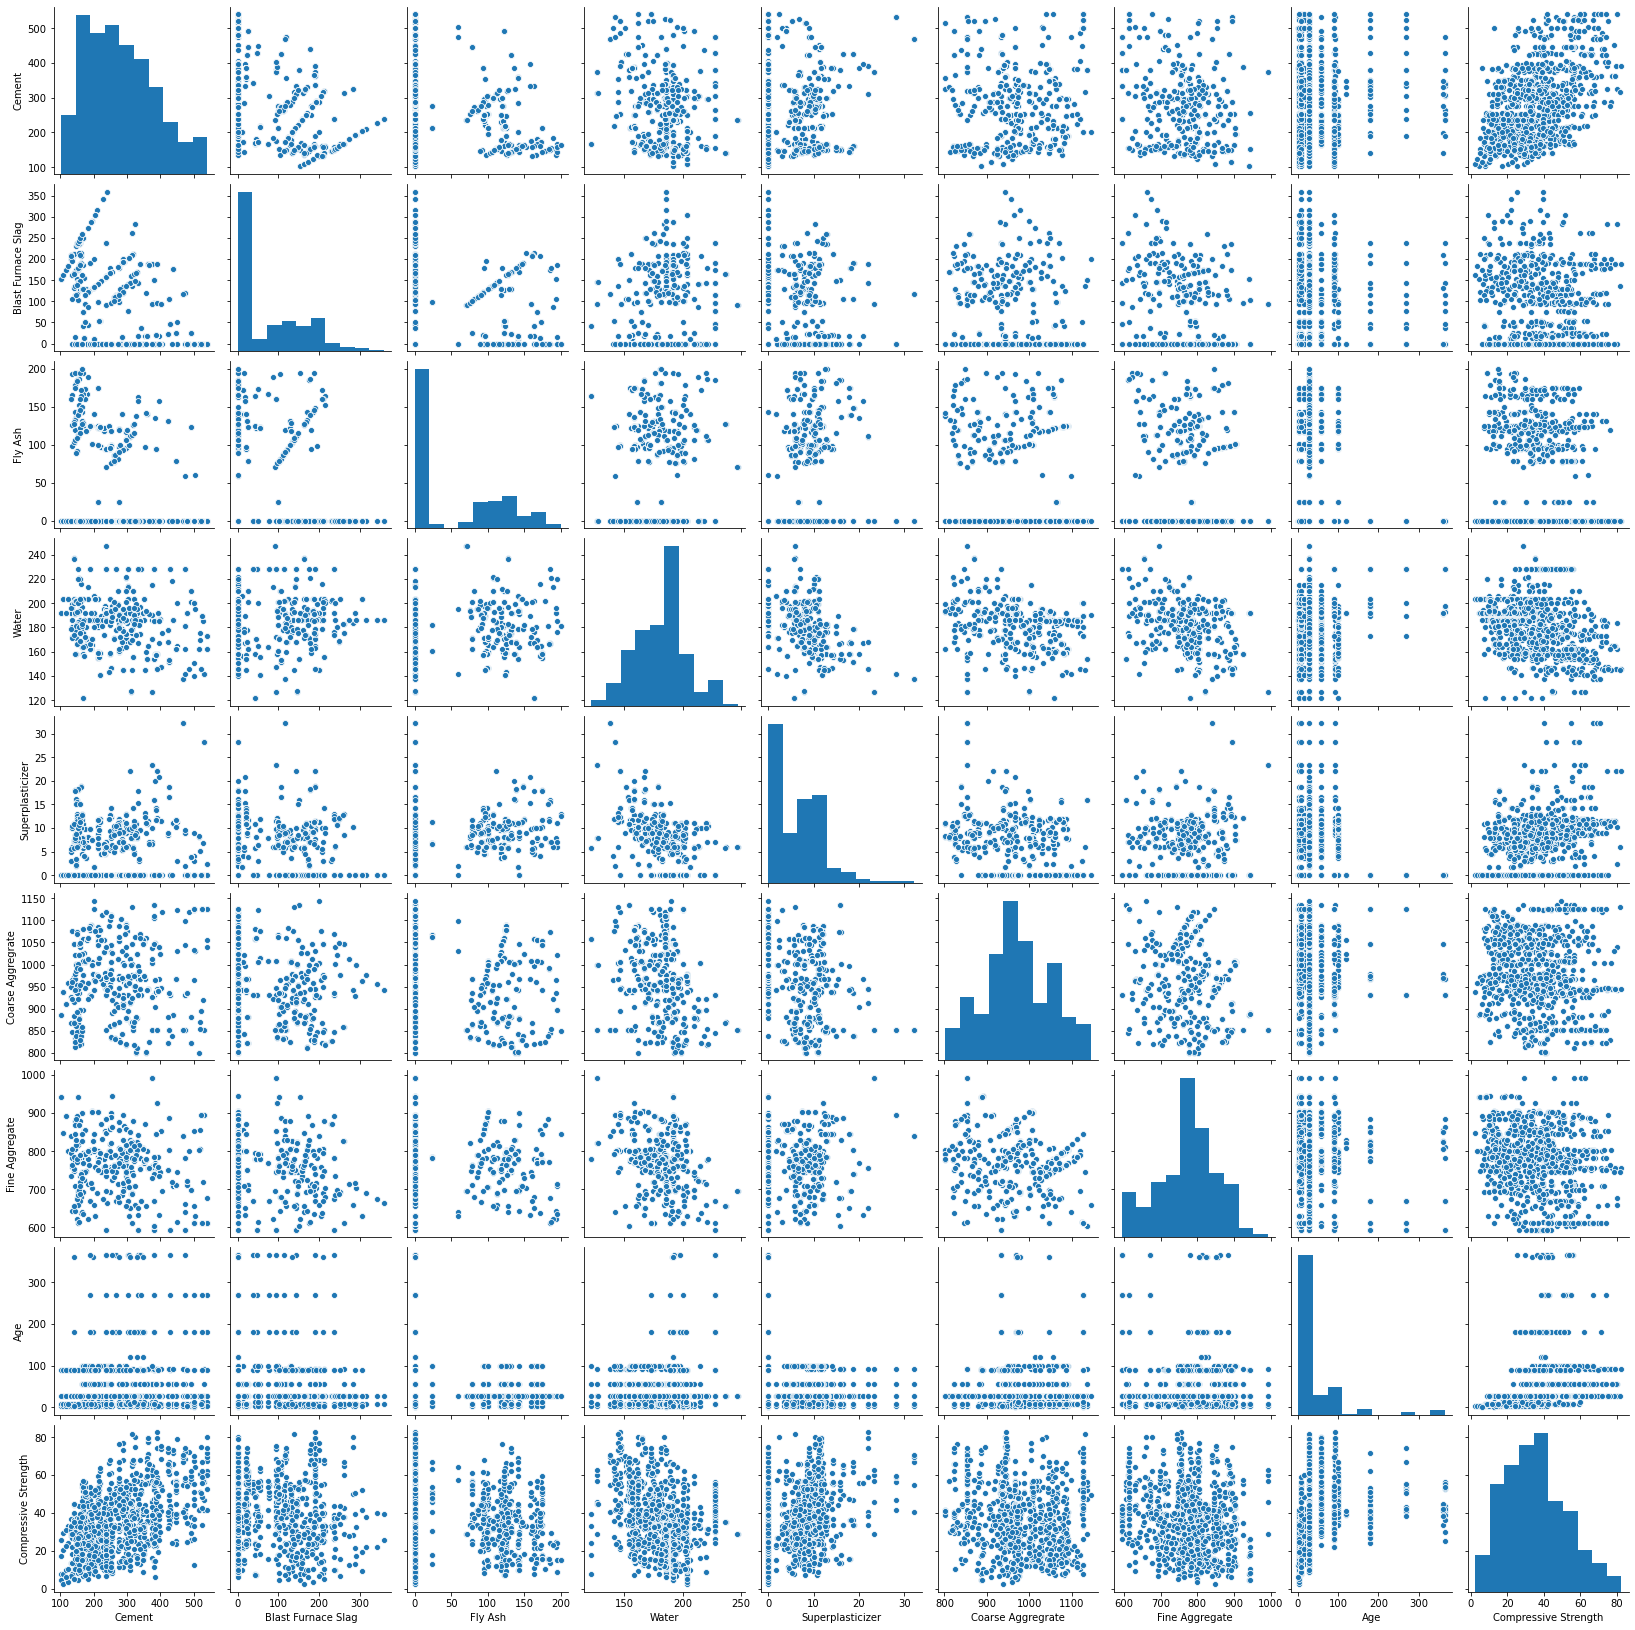

In [12]:
sns.pairplot(df)
plt.show()

At first glance, there doesn't seem to be any high correlation between any 2 features. Although Cement and Compressive Strength look like they may have some correlation. Let's determine the Pearson Correlation coefficients to get a numerical value of the strength of the correlations.

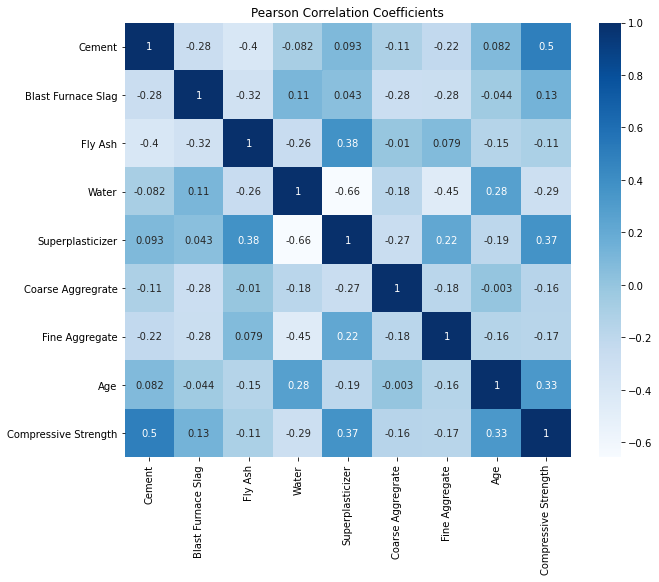

In [16]:
corr = df.corr()

plt.figure(figsize = (10,8))
sns.heatmap(corr, cmap = 'Blues', annot = True)
plt.title('Pearson Correlation Coefficients')
plt.show()

In [11]:
corr_sorted = corr.unstack().sort_values(kind='quicksort', ascending = False)

In [12]:
print(corr_sorted[corr_sorted!=1].head(10))
print(corr_sorted[corr_sorted!=1].tail(10))

Cement                Compressive Strength    0.497833
Compressive Strength  Cement                  0.497833
Fly Ash               Superplasticizer        0.377340
Superplasticizer      Fly Ash                 0.377340
                      Compressive Strength    0.366102
Compressive Strength  Superplasticizer        0.366102
Age                   Compressive Strength    0.328877
Compressive Strength  Age                     0.328877
Water                 Age                     0.277604
Age                   Water                   0.277604
dtype: float64
Compressive Strength  Water                  -0.289613
Water                 Compressive Strength   -0.289613
Blast Furnace Slag    Fly Ash                -0.323569
Fly Ash               Blast Furnace Slag     -0.323569
                      Cement                 -0.397475
Cement                Fly Ash                -0.397475
Fine Aggregate        Water                  -0.450635
Water                 Fine Aggregate         -0.45

The next code cell makes future tables align to the left of a cell in a Jupyter Notebook, but unfortunately doesn't work in the Github viewer

In [17]:
%%html
<style>
table {float:left}
</style>

As expected, there aren't many high correlations with Compressive Strength (CS). The only significant ones are the following 3 top features.

|Feature|Correlation w/ CS|
|:---|:---|
|Cement|0.50|
|Superplasticizer|0.37|
|Age|0.33|

Looking at the top 3 with the highest negative correlation, perhaps water could be a useful variable, Fine Aggregate and Age are unlikely to be helpful in isolation.  

|Feature|Correlation w/ CS|
|:---|:---|
|Water|-0.29|
|Fine Aggregate|-0.17|
|Age|-0.16|

Some other notable strong correlations include the following.

|Features|Correlation|
|:---|:---|
|Superplasticizer / Water|-0.66|
|Fine Aggregate / Water|-0.45|
|Cement / Fly Ash|-0.40|
|Fly Ash / Superplasticizer|0.38|

Using the initial view of correlations, let's look more closely at some of the relationships between features we might expect to have influences on each other.

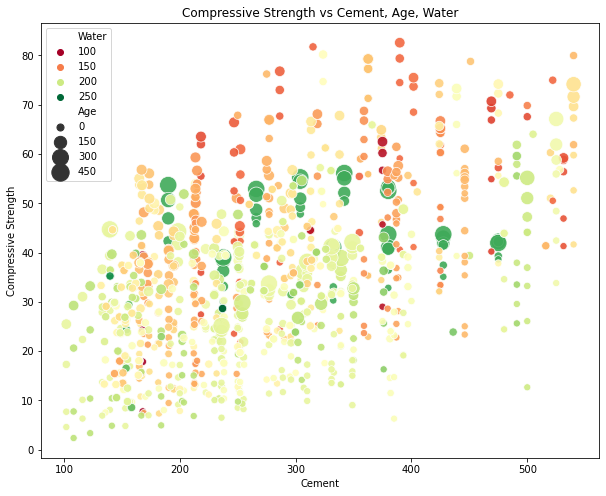

In [24]:
fig, ax = plt.subplots(figsize=(10,8))
sns.scatterplot(y="Compressive Strength", x="Cement", hue="Water", size="Age", data=df, ax=ax, sizes=(50, 300),
                palette='RdYlGn', alpha=0.9)
ax.set_title("Compressive Strength vs Cement, Age, Water")
ax.legend()
plt.show()

From this plot we can make some sensible observations on the relationships between these variables and compressive strength:  

* Compressive strength correlates positively with cement
* Compressive strength correlates positively with age, though less than cement
* High compressive strength with a low age requires more cement
* Older cement tends to require more water, as shown by the larger green data points
* Compressive strength correlates negatively with water

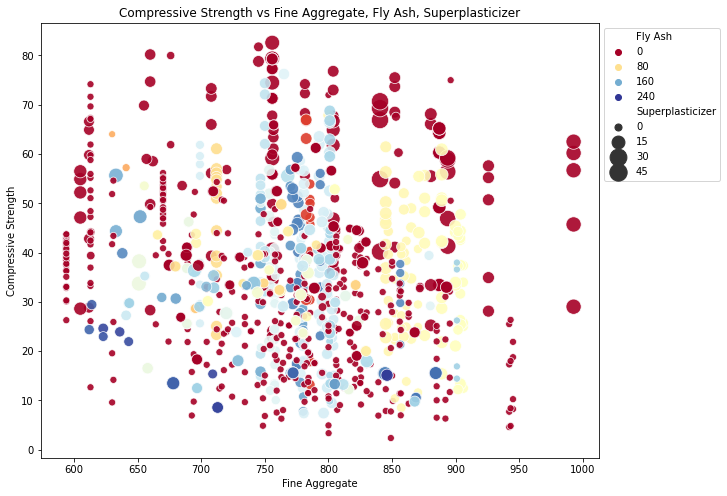

In [30]:
fig, ax = plt.subplots(figsize=(10,8))
sns.scatterplot(y="Compressive Strength", x="Fine Aggregate", hue="Fly Ash", size="Superplasticizer", data=df, ax=ax, sizes=(50, 300),
                palette='RdYlBu', alpha=0.9)
ax.set_title("Compressive Strength vs Fine Aggregate, Fly Ash, Superplasticizer")
ax.legend(loc="upper left", bbox_to_anchor=(1,1)) # Moved outside the chart so it doesn't cover any data
plt.show()

From this plot we can make further observations on the relationships between this second set of variables and compressive strength:  

* Compressive strength correlates negatively with fly ash
* Compressive strength correlates positively with superplasticizer

Through some very simple charts we have discovered relationships between ingredients that allow us to make predictions on what our future model will value when seeking a high compressive strength.  

It is likely that the ideal concrete mixture (when prioritising compressive strength) will consist of:

* Large quantity of cement
* Potentially a long aging process however this comes at the cost of adding water, which negatively impacts the strength
* Large quantity of superplasticizer

Let's start modelling and see if we were right...

## Data Preparation

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [36]:
# Splitting the features and target variable

cols = df.columns.drop('Compressive Strength')
X = df[cols]
y = df['Compressive Strength']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [39]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modelling

### Linear Regression

In [73]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

model_list = ['Linear Regression', 'Lasso', 'Ridge']

def fit_models (X_train, y_train):
    lr = LinearRegression()
    lasso = Lasso()
    ridge = Ridge()
    
    lr.fit(X_train, y_train)
    lasso.fit(X_train, y_train)
    ridge.fit(X_train, y_train)
    
    return [lr, lasso, ridge]

In [74]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def calc_scores (model, X_test, y_test):
    y_pred = model.predict(X_test)
    rmse = np.sqrt((mean_squared_error)(y_test, y_pred))
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return {'model': model, 'rmse': rmse, 'mse': mse, 'mae': mae, 'r2': r2}

In [75]:
fit_models(X_train, y_train)

for model in models:
    results = calc_scores(model, X_test, y_test)

    print('Model: {}'.format(type(model).__name__))
    print('RMSE: {}'.format(results['rmse']))
    print('MSE: {}'.format(results['mse']))
    print('MAE: {}'.format(results['mae']))
    print('R2: {}'.format(results['r2']))
    print()
    

Model: LinearRegression
RMSE: 10.285045326177856
MSE: 105.78215736153298
MAE: 8.227065183875991
R2: 0.5700226130111652

Model: Lasso
RMSE: 10.683378028613092
MSE: 114.13456610225295
MAE: 8.655699896618504
R2: 0.536072209890502

Model: Ridge
RMSE: 10.288679160592705
MSE: 105.85691886961462
MAE: 8.235756362197144
R2: 0.5697187266214934



It looks like the performance of the 3 linear regression models is very similar, aside from the slightly worse MSE by the Lasso regressor.

In [80]:
lr.fit(X_train, y_train)
lr.predict(X_test)
lr.coef_

array([12.665022  ,  8.741348  ,  5.50216877, -3.76887495,  1.57510915,
        0.98122091,  1.17807011,  7.24881284])

In [ ]:
# DO SOME PARAMETER TUNING BEFORE LOOKING AT COEFFICIENTS
# GRIDSEARCHCV

### Decision Trees